In [1]:
import torch

In [2]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3080 Ti'

In [3]:
x = [[1, 2], [3, 4], [5, 6], [7, 8]]
y = [[3], [7], [11], [15]]

In [4]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
X = X.to(device)
Y = Y.to(device)

In [7]:
import torch.nn as nn

In [8]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.input_to_hidden_layer = nn.Linear(2, 8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8, 1)

    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)

        return x
        

In [9]:
mynet = MyNeuralNet().to(device)

In [10]:
mynet.input_to_hidden_layer.weight

Parameter containing:
tensor([[-0.3952, -0.1692],
        [-0.4083,  0.6146],
        [ 0.4515, -0.1531],
        [-0.1990, -0.0983],
        [ 0.5418, -0.1815],
        [ 0.4620,  0.0473],
        [-0.3321, -0.4017],
        [ 0.3748,  0.6630]], device='cuda:0', requires_grad=True)

In [11]:
mynet.parameters()

<generator object Module.parameters at 0x7f6da9ec4510>

In [12]:
for par in mynet.parameters():
    print(par)

Parameter containing:
tensor([[-0.3952, -0.1692],
        [-0.4083,  0.6146],
        [ 0.4515, -0.1531],
        [-0.1990, -0.0983],
        [ 0.5418, -0.1815],
        [ 0.4620,  0.0473],
        [-0.3321, -0.4017],
        [ 0.3748,  0.6630]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([ 0.6929, -0.4365,  0.2697, -0.3818, -0.6754,  0.0091, -0.3327,  0.5668],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.1874, -0.1387, -0.1614,  0.3476,  0.1694, -0.0624, -0.2324, -0.0555]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0781], device='cuda:0', requires_grad=True)


In [13]:
loss_func = nn.MSELoss()

In [14]:
_Y = mynet(X)

In [15]:
loss_value = loss_func(_Y, Y)

In [16]:
print(loss_value)

tensor(117.2454, device='cuda:0', grad_fn=<MseLossBackward0>)


In [17]:
from torch.optim import SGD

In [18]:
opt = SGD(mynet.parameters(), lr = 0.001)

In [19]:
loss_history = []

for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X), Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.detach().cpu().numpy())

In [20]:
import matplotlib.pyplot as plt

In [21]:
%matplotlib inline

Text(0, 0.5, 'loss value')

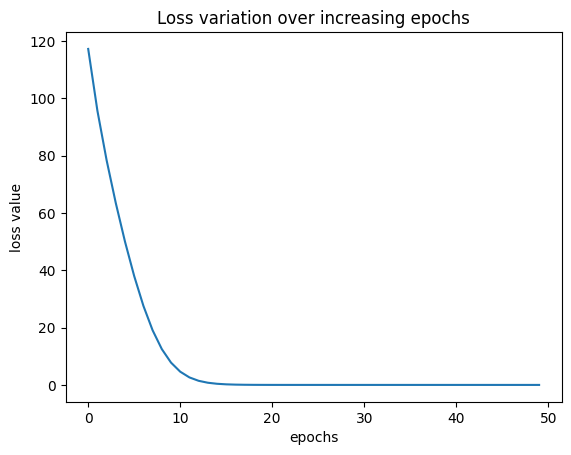

In [22]:
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

In [23]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

In [24]:
x = [[3, 5], [7, 9], [1, 9], [5, 9], [2, 10]]
y = [[8], [16], [10], [14], [12]]

In [25]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [26]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [27]:
X = X.to(device)
Y = Y.to(device)

In [28]:
for X_i in X:
    print(mynet(X_i))

tensor([8.0091], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.8045], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.5340], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7138], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.4826], device='cuda:0', grad_fn=<AddBackward0>)
